In [2]:
import numpy as np
import random
import csv

from idtrees.utils import read_tifs #, load_data # Import data utils
%matplotlib inline 
import matplotlib.pyplot as plt

## Read and display one hyperspectral image

HSI image shape:  (369, 20, 20)


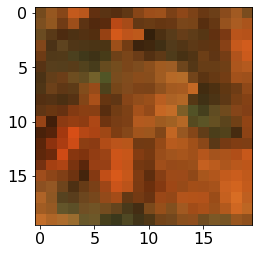

In [17]:
hsi_im_paths = read_tifs.get_im_paths('HSI')
im_id = 10
im = read_tifs.read_tif_to_ndarray(hsi_im_paths[im_id])

# Grab a random three band combination
# TODO: find a better three band combination
bands = (90,230,330)
im_plt = np.rollaxis(im[bands,:,:],0,start=3)
print('HSI image shape: ', im.shape)
plt.imshow(im_plt)

## Show first n hyperspectral images 

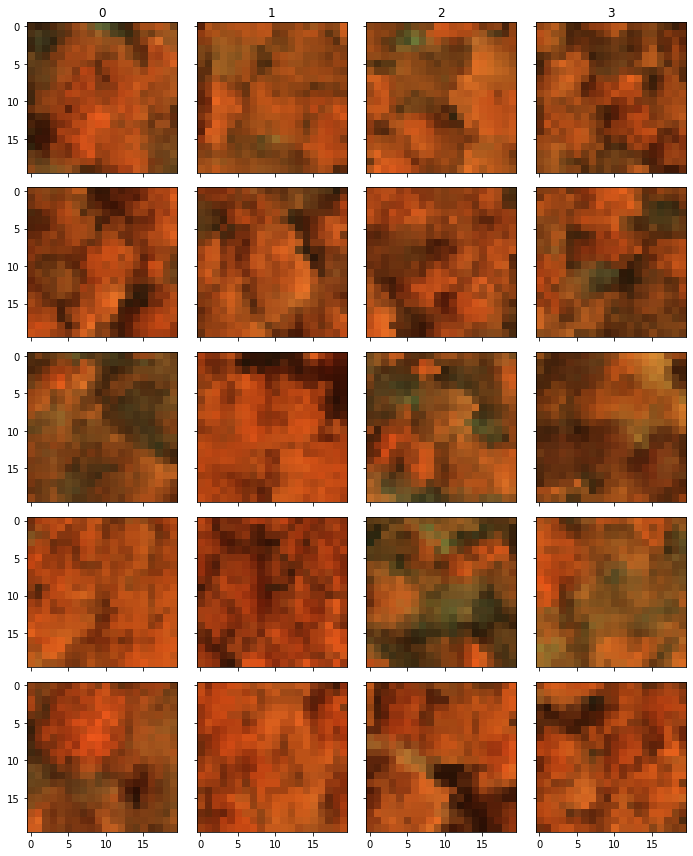

In [5]:
n = 20
ims = read_tifs.read_all_tif_to_ndarray(hsi_im_paths)[:n]
read_tifs.plot_all_ims(ims[:,bands,:,:], title='hsi')

In [6]:
# Read in all HSI images
ims_hsi = read_tifs.read_all_tif_to_ndarray(hsi_im_paths)
print('Number of HSI images: ', ims_hsi.shape[0])

Number of HSI images:  85


## Plot mean over all hyperspectral pixels in all images

(85, 369, 20, 20)


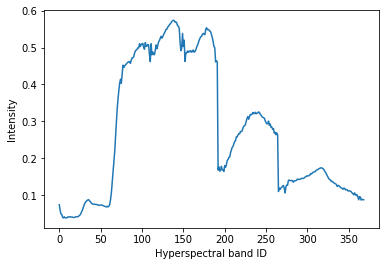

In [7]:
read_tifs.plot_spectral_curve(ims_hsi)

## Read in hyperspectral pixels of every tree bounding box with torch dataloader
#### TODO: rewrite this function to show how torch dataloader is used

In [10]:
data = read_tifs.get_hsi_pixels()

Number of trees, labeled with species and bounding box:  1165
[WARNING] Loaded box has zero shape and is sketchily inflated. TODO: skip this box
[WARNING] Loaded box has zero shape and is sketchily inflated. TODO: skip this box


In [11]:
print('Data shape: ', data.shape)
print('Number of pixels within bounding boxes: ', data.shape[1])
class_ids = np.unique(data[0,:]) # Class_ids should start with 1
print('Number of classes: ', class_ids.shape[0])

Data shape:  (370, 35488)
Number of pixels within bounding boxes:  35488
Number of classes:  33


## Print class distribution, i.e., number of trees per class
#### Insights
- There is some classes with very little data (e.g., class 7, 11, 27)

In [12]:
import pandas as pd
df = pd.read_csv('data/train/Field/taxonID_ScientificName.csv')

class_id_val = []
n_px_val = []
sci_names = []

# Iterate over each class and print class id, number of pixels, and scientific name
print('cls_id \tn_px \tscientific name')
for c in class_ids:
    ids_in_c = np.argwhere([data[0,:] == c])[:,1]
    n_px = data[0,ids_in_c].shape[0]
    sci_name = df[df.taxonCode==c].scientificName.iloc[0]
    class_id_val.append(c)
    n_px_val.append(n_px)
    sci_names.append(sci_name)
    
    print(str(int(c)) +":\t"+ str(n_px) + "\t"+  sci_name)

cls_id 	n_px 	scientific name
1:	202	Acer pensylvanicum L.
2:	4647	Acer rubrum L.
3:	42	Acer saccharum Marshall
4:	1439	Amelanchier laevis Wiegand
5:	182	Betula sp.
6:	222	Carya glabra (Mill.) Sweet
7:	12	Carya tomentosa (Lam.) Nutt.
8:	76	Fagus grandifolia Ehrh.
9:	30	Gordonia lasianthus (L.) Ellis
10:	755	Liriodendron tulipifera L.
11:	8	Lyonia lucida (Lam.) K. Koch
12:	464	Magnolia sp.
13:	60	Nyssa biflora Walter
14:	1286	Nyssa sylvatica Marshall
15:	270	Oxydendrum sp.
16:	18	Persea palustris (Raf.) Sarg.
17:	186	Pinus elliottii Engelm.
18:	8700	Pinus palustris Mill.
19:	454	Pinus sp.
20:	238	Pinus taeda L.
21:	144	Prunus serotina Ehrh.
22:	4392	Quercus alba L.
23:	2066	Quercus coccinea
24:	402	Quercus geminata Small
25:	142	Quercus hemisphaerica W. Bartram ex Willd.
26:	2073	Quercus laevis Walter
27:	9	Quercus laurifolia Michx.
28:	487	Quercus montana Willd.
29:	76	Quercus nigra L.
30:	6207	Quercus rubra L.
31:	15	Quercus sp.
32:	66	Robinia pseudoacacia L.
33:	118	Tsuga canadensis 

In [13]:
freq = pd.DataFrame({'class_ids': class_id_val, 'num_pix': n_px_val, 'sci_names': sci_names})
print(freq)

    class_ids  num_pix                                   sci_names
0         1.0      202                       Acer pensylvanicum L.
1         2.0     4647                              Acer rubrum L.
2         3.0       42                     Acer saccharum Marshall
3         4.0     1439                  Amelanchier laevis Wiegand
4         5.0      182                                  Betula sp.
5         6.0      222                  Carya glabra (Mill.) Sweet
6         7.0       12                Carya tomentosa (Lam.) Nutt.
7         8.0       76                     Fagus grandifolia Ehrh.
8         9.0       30              Gordonia lasianthus (L.) Ellis
9        10.0      755                  Liriodendron tulipifera L.
10       11.0        8                Lyonia lucida (Lam.) K. Koch
11       12.0      464                                Magnolia sp.
12       13.0       60                        Nyssa biflora Walter
13       14.0     1286                    Nyssa sylvatica Mars

## Plot average hyperspectral curve per tree species
#### Insights: 
- The standard deviation over all pixels of the same species is very high (Note: the plot scales the std deviation down by 10) 
- The near-infrared spectrum (bands 60-200) has a lot stronger reflectance than the RGB spectrum (bands 0-60)
- TODO: Check if there's outliers that blow up std dev
- TODO: Check which bands are impacted by atmospheric absorbance (e.g., H2O) and if these bands have already been removed

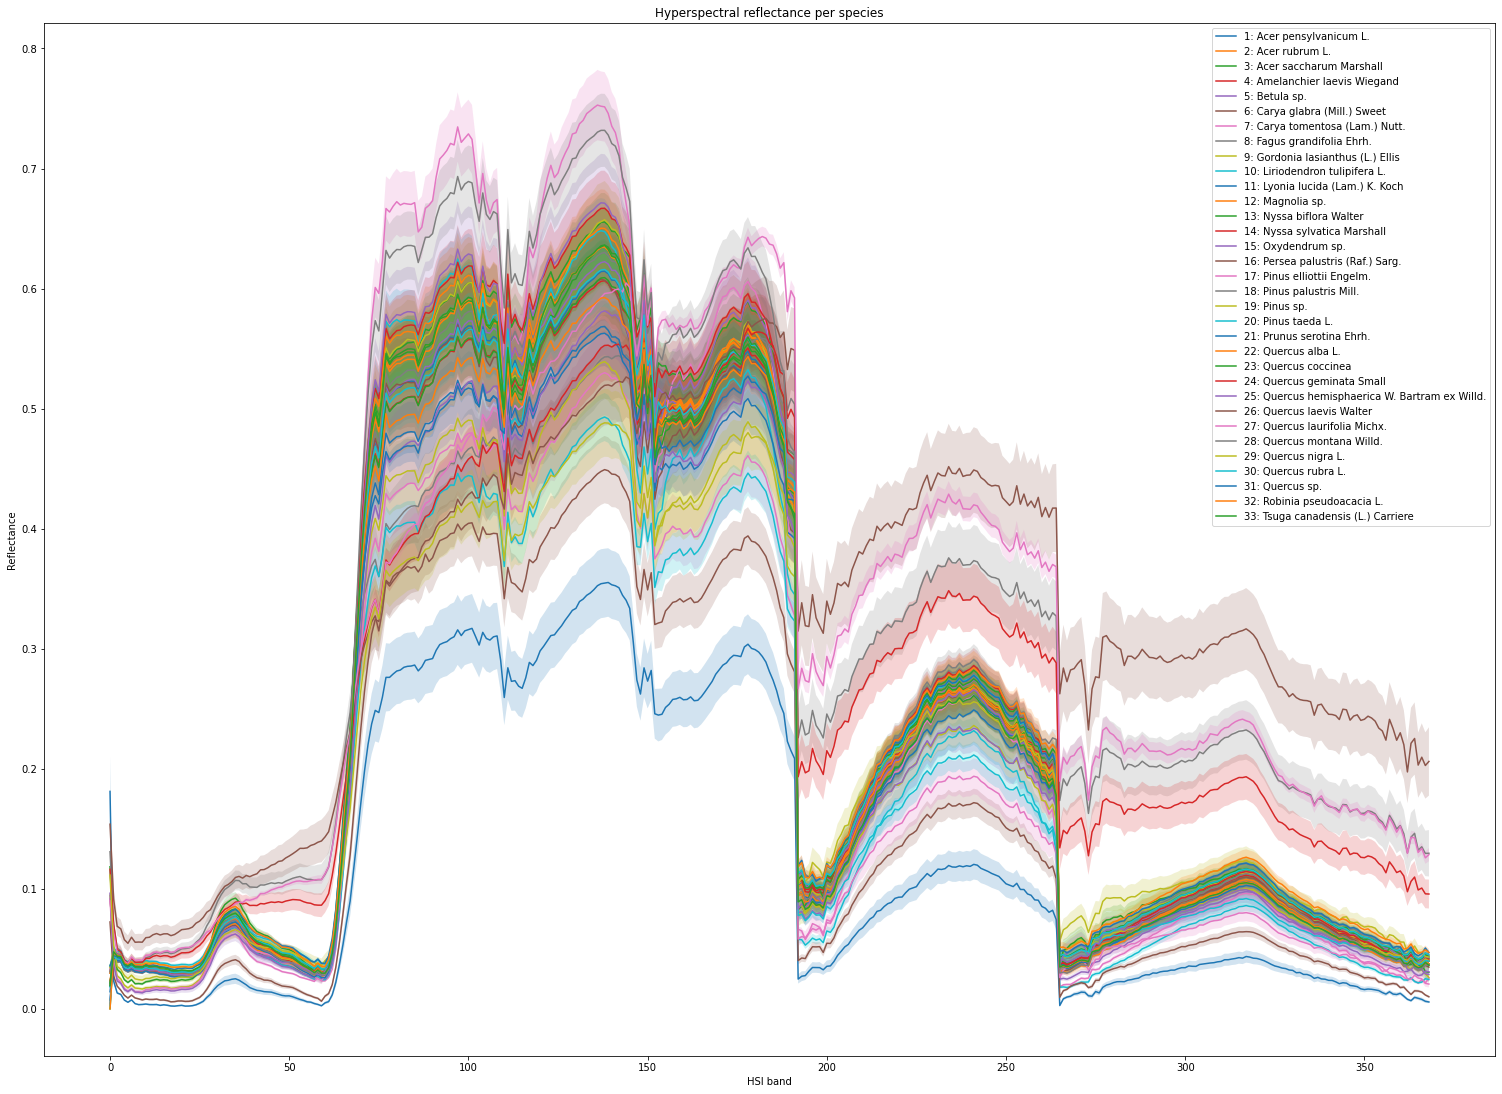

In [14]:
read_tifs.plot_hyperspectral_curve_per_species(data, class_ids, scale_std = 1/5.)

## Plot histogram of each tree species (class)
#### Insights
- There is little outlier data
- Histograms do vary over species


/Users/lamaoudi/Dropbox/Mac/Documents/dual/6.883 Completion/idtrees/utils/read_tifs.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array([hist[0], hist[1]]) # Copy tuple into array
/Users/lamaoudi/Dropbox/Mac/Documents/dual/6.883 Completion/idtrees/utils/read_tifs.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array([hist[0], hist[1]]) # Copy tuple into array
/Users/lamaoudi/Dropbox/Mac/Documents/dual/6.883 Completion/idtrees/utils/read_tifs.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequ

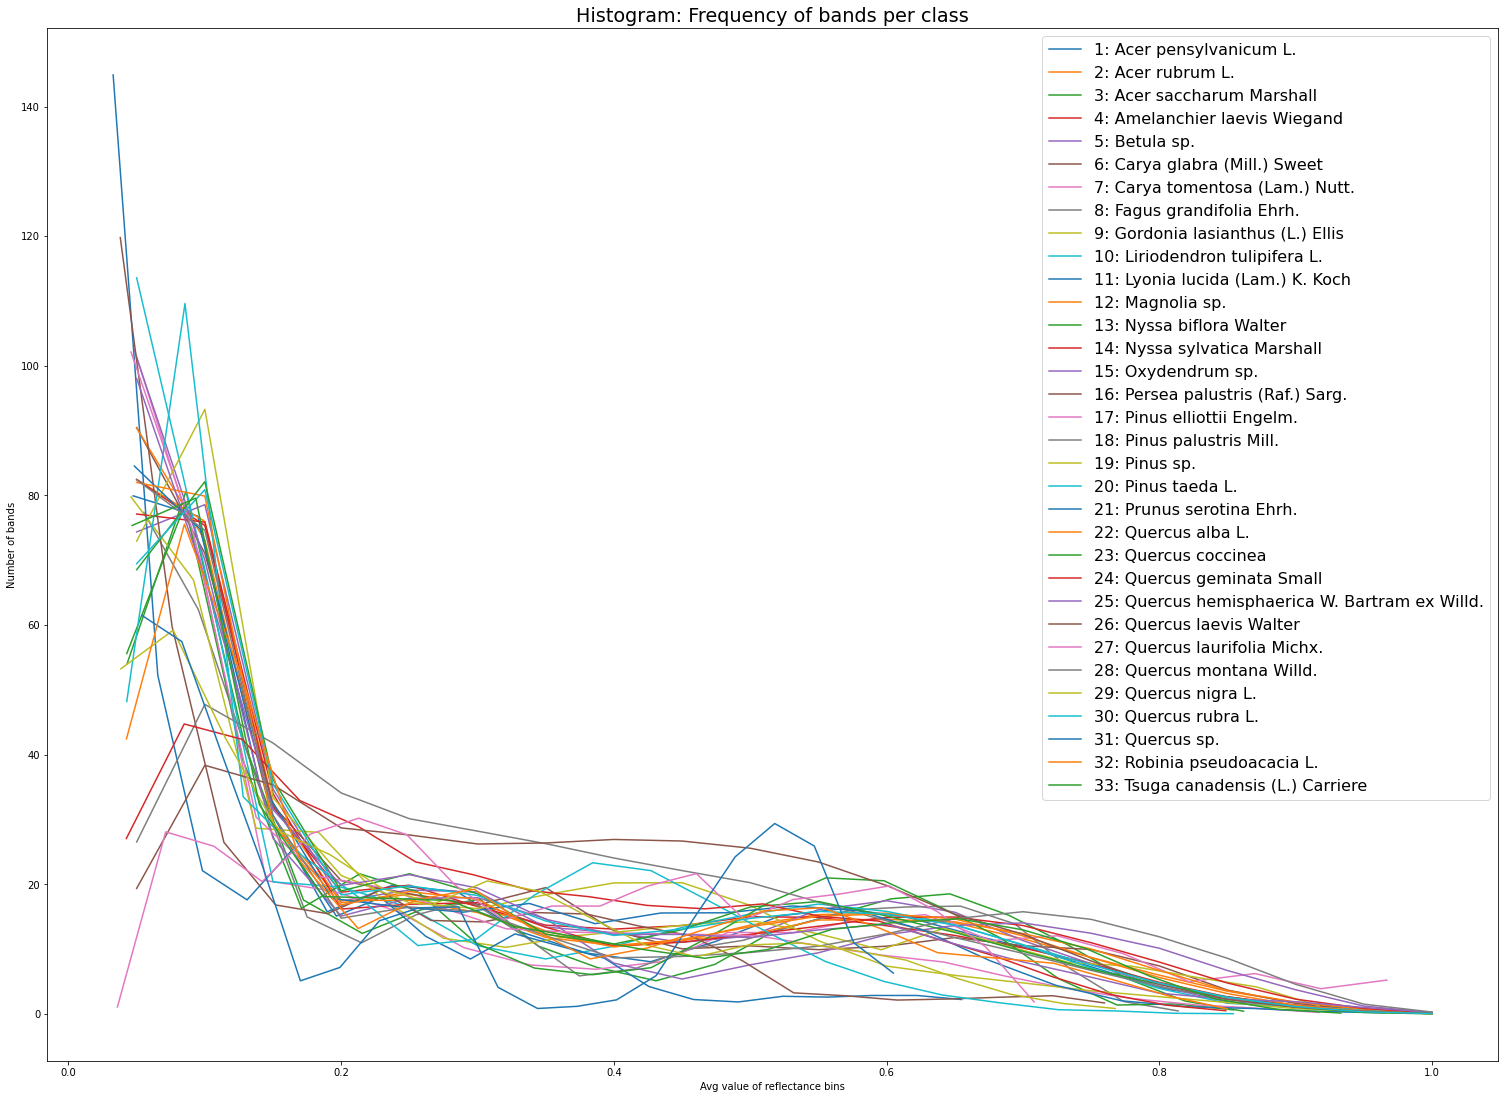

In [15]:
read_tifs.plot_histogram_per_species(data, class_ids, n_bins=20)

### Reduce Number of Classes, to classes with over 400 observations 

In [165]:
data2 = data
df2 = freq.loc[freq['num_pix'] >= 200]
df2 = df2.drop

new_class_ids = np.array(df2.class_ids)

print(new_class_ids)

rows, columns = data2.shape
index_cols = []

for c in new_class_ids: 
    trees_in_c = np.argwhere([data2[0,:] == c])
    #new_data = data2[:, trees_in_c[:, 1]]

for i in range(0, columns): 
    if (data2[0, i] in new_class_ids):
        index_cols.append(i)

#print(index_cols)
data_new = data2[:, index_cols]
#print(data_new)

[ 1.  2.  4.  6. 10. 12. 14. 15. 18. 19. 20. 22. 23. 24. 26. 28. 30.]


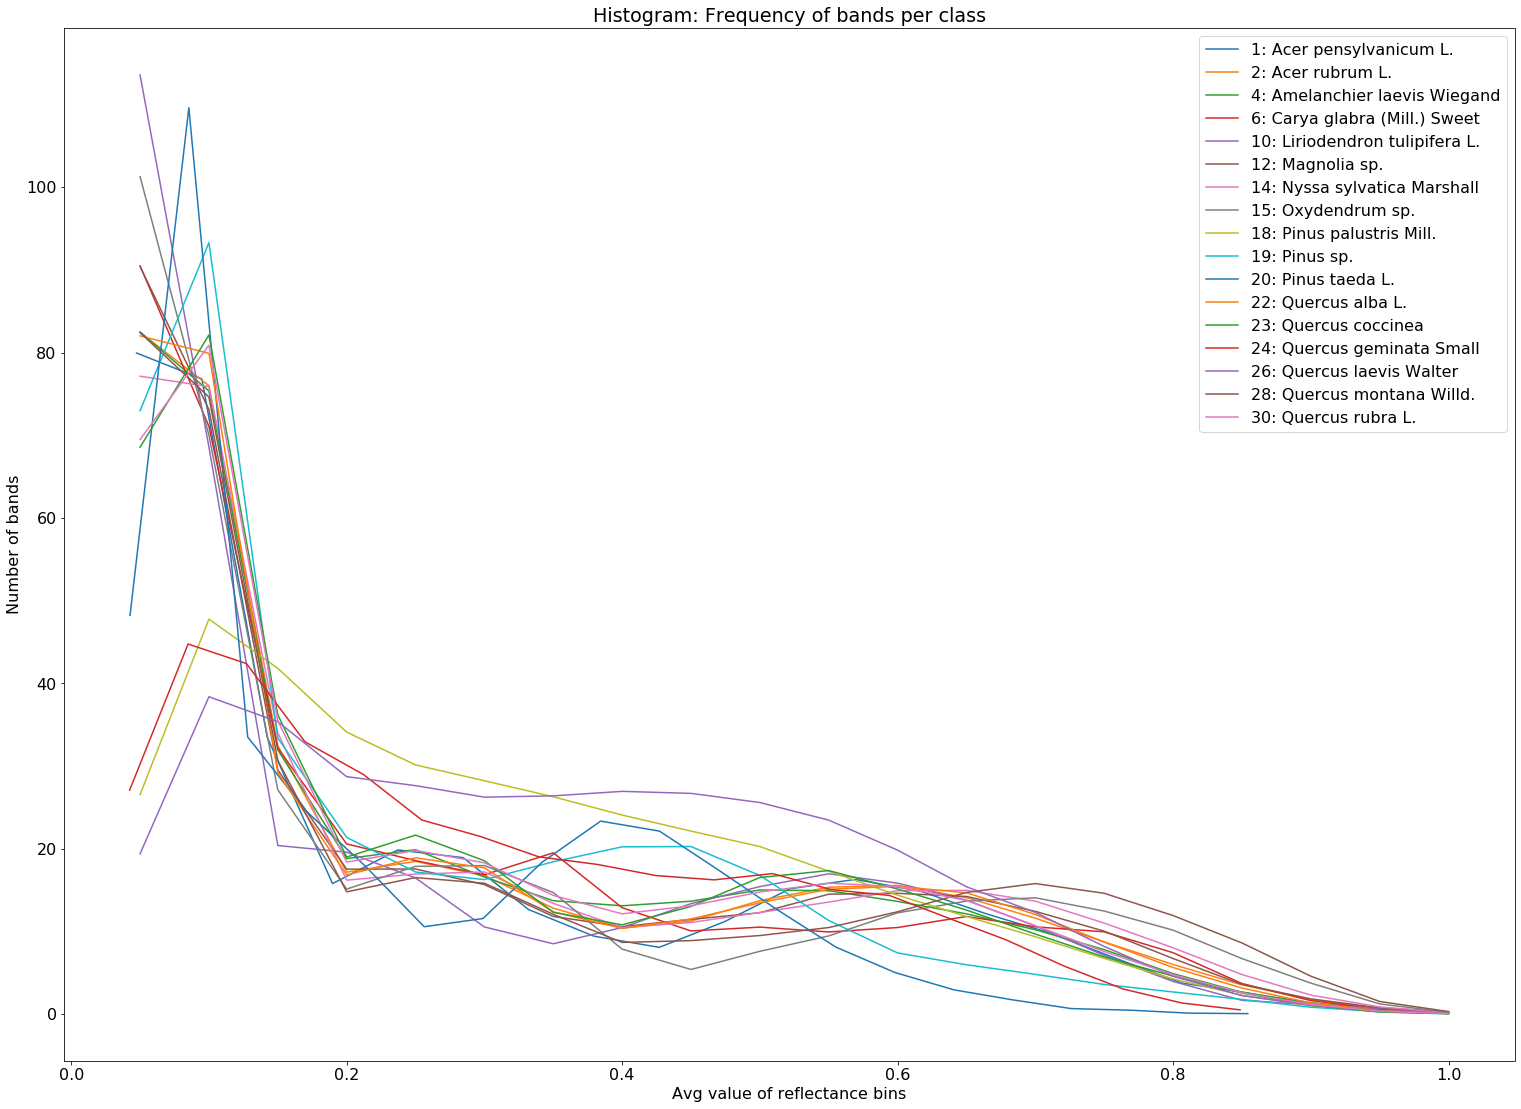

In [166]:
read_tifs.plot_histogram_per_species(data_new, new_class_ids, n_bins=20)

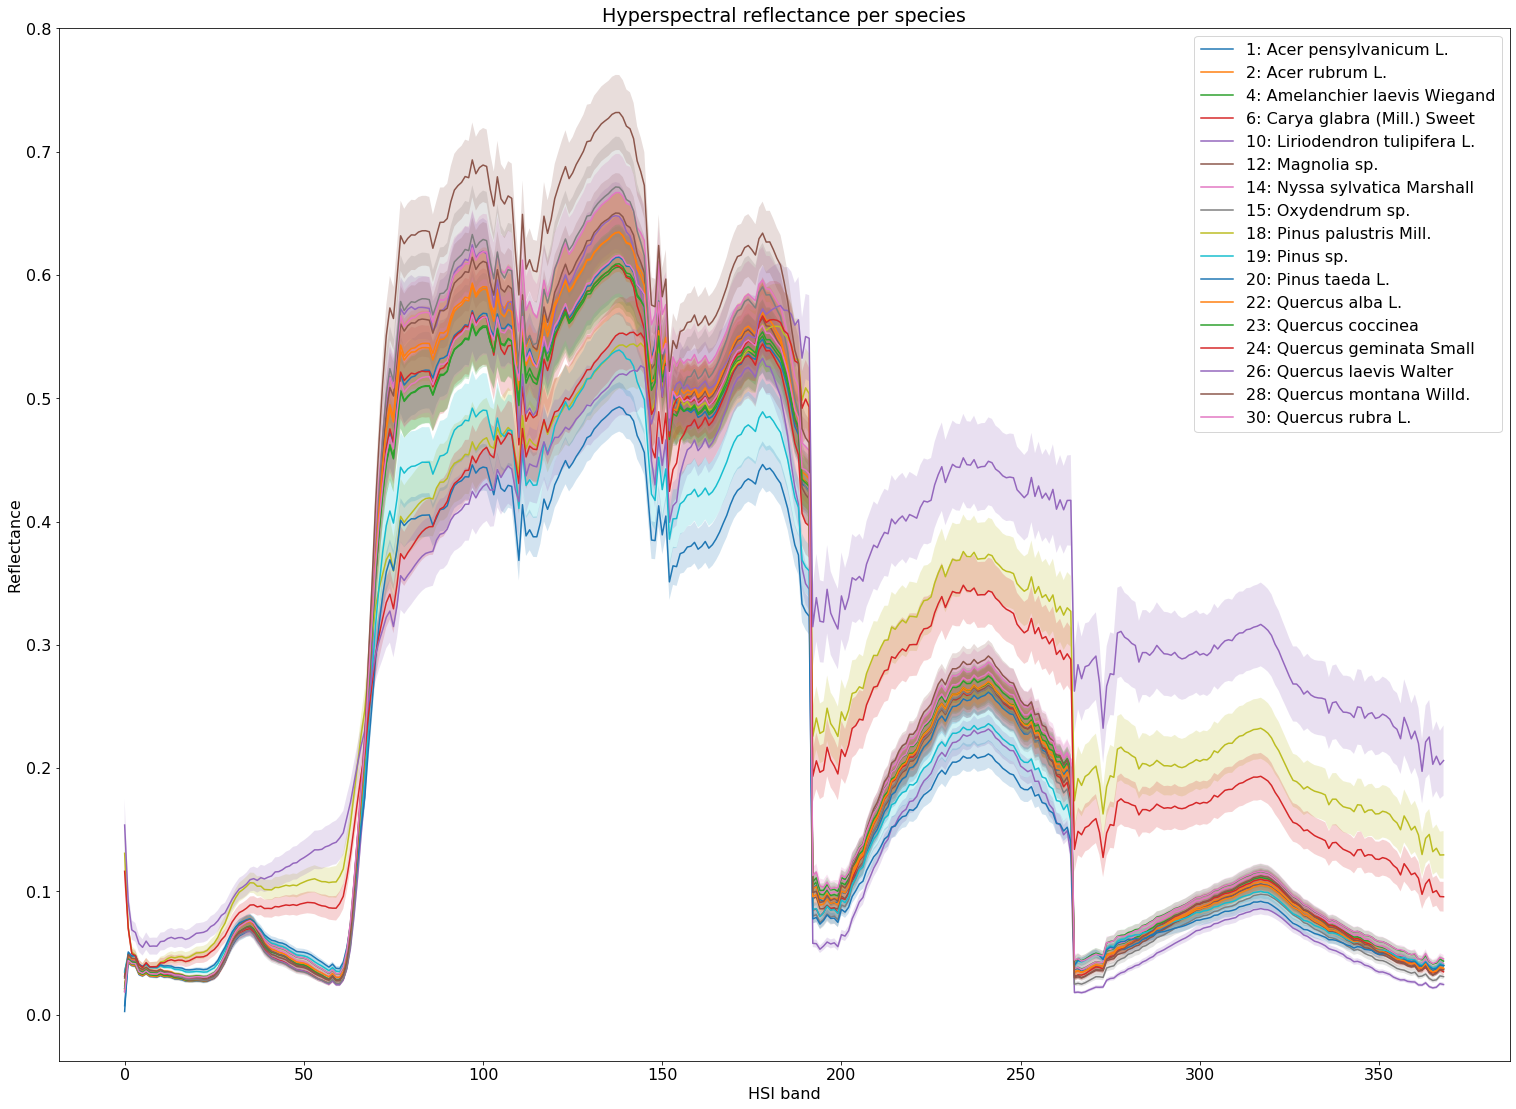

In [168]:
read_tifs.plot_hyperspectral_curve_per_species(data_new, new_class_ids, scale_std = 1/5.)

In [130]:
data3 = data2[:, index_cols]
data3.shape

(370, 16057)

In [102]:
print(data_test.shape)
print(data.shape)

(370, 35487)
(370, 35488)
